<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/tensorflow_withdl/RNN_deeplearning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN IN DEEP LEARNING
---

NORMAL LSTM
---


In [12]:
import numpy as np
import tensorflow as tf

# Output size (hidden size) for the LSTM cell
LSTM_CELL_SIZE = 4

# Create an LSTM cell
lstm_cell = tf.keras.layers.LSTMCell(LSTM_CELL_SIZE)

# Initial state: tuple of (hidden state, cell state)
state = (tf.zeros([1, LSTM_CELL_SIZE]), tf.zeros([1, LSTM_CELL_SIZE]))

# Sample input: shape (batch_size, input_dim)
sample_input = tf.constant([[3, 2, 2, 2]], dtype=tf.float32)

# Pass the input and state to the cell
output, state_new = lstm_cell(sample_input, state)

print("New State:", state_new)
print("Output:", output)

New State: [<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.05421178, -0.07301875,  0.14467534,  0.01661676]],
      dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.08562756, -0.16247335,  0.33557424,  0.13854209]],
      dtype=float32)>]
Output: tf.Tensor([[-0.05421178 -0.07301875  0.14467534  0.01661676]], shape=(1, 4), dtype=float32)


In [13]:
import numpy as np
import tensorflow as tf

# Parameters
batch_size = 1
timesteps = 6
input_dim = 4
lstm_units = 4

# Create sample input: shape (batch_size, timesteps, input_dim)
sample_input = np.random.rand(batch_size, timesteps, input_dim).astype(np.float32)

# Define LSTM layer
lstm_layer = tf.keras.layers.LSTM(lstm_units, return_sequences=False, return_state=True)

# Run the LSTM layer
output, state_h, state_c = lstm_layer(sample_input)

print("Output:", output)
print("Hidden state:", state_h)
print("Cell state:", state_c)

Output: tf.Tensor([[ 0.02363706 -0.21255466  0.247944   -0.18370521]], shape=(1, 4), dtype=float32)
Hidden state: tf.Tensor([[ 0.02363706 -0.21255466  0.247944   -0.18370521]], shape=(1, 4), dtype=float32)
Cell state: tf.Tensor([[ 0.03575199 -0.47591037  0.7147632  -0.51325727]], shape=(1, 4), dtype=float32)


LST HIDDEN STATE OVER TIME
---

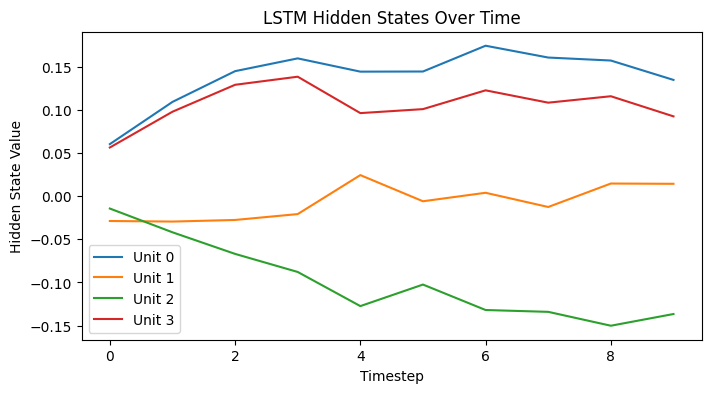

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Setup simple LSTM
lstm_units = 4
timesteps = 10
input_dim = 3
batch_size = 1

# Random input
sample_input = np.random.rand(batch_size, timesteps, input_dim).astype(np.float32)

# LSTM layer with output for all timesteps
lstm_layer = tf.keras.layers.LSTM(lstm_units, return_sequences=True)
outputs = lstm_layer(sample_input)  # shape (batch_size, timesteps, lstm_units)

# Visualize outputs for the first sample
plt.figure(figsize=(8, 4))
for i in range(lstm_units):
    plt.plot(outputs[0, :, i], label=f'Unit {i}')
plt.xlabel('Timestep')
plt.ylabel('Hidden State Value')
plt.title('LSTM Hidden States Over Time')
plt.legend()
plt.show()

Problem statement -Predict the next number in a sequence
---

In [16]:
# using lstm to do this probelm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [17]:
# preparing the datatset
X=[]
y=[]
sequance_length=3
data=np.array([i for i in range(1,21)]) # [1,...20]
for i in range (len(data)-sequance_length):
  X.append(data[i:i+sequance_length])
  y.append(data[i+sequance_length])
X=np.array(X)
y=np.array(y)
# Reshape input to [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))



In [18]:
# building LSRTM model
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(3,1)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# TRAIN
model.fit(X,y,epochs=100,verbose=0)

# predict
test_input=np.array([18,19,20]).reshape((1,3,1))
predicted = model.predict(test_input, verbose=0)
print("Predicted next number:", predicted[0][0])

Predicted next number: 20.282394


In [27]:
# we got wrng prediction we will fix it by

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Data
data = np.array([i for i in range(1, 21)])  # [1 to 20]

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
X = []
y = []
seq_len = 3
for i in range(len(data_scaled) - seq_len):
    X.append(data_scaled[i:i+seq_len])
    y.append(data_scaled[i+seq_len])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=0)

# Predict next number after 18,19,20 → we need to scale it
test_input = np.array([18, 19, 20])
test_input_scaled = scaler.transform(test_input.reshape(-1, 1)).flatten()
test_input_scaled = test_input_scaled.reshape((1, seq_len, 1))

predicted_scaled = model.predict(test_input_scaled, verbose=0)
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))
print("✅ Predicted next number:", predicted[0][0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Predicted next number: 21.46637


SIMPLE RNN
---
* Build a next character predictor

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder

# Sample text
text = "hello world"

# Unique characters
chars = sorted(set(text))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Prepare dataset
X = []
y = []
seq_len = 3

for i in range(len(text) - seq_len):
    seq = text[i:i+seq_len]
    target = text[i+seq_len]
    X.append([char_to_int[ch] for ch in seq])
    y.append(char_to_int[target])

X = np.array(X)
y = np.array(y)

# One-hot encode input
X = tf.keras.utils.to_categorical(X, num_classes=len(chars))
y = tf.keras.utils.to_categorical(y, num_classes=len(chars))

# Reshape to (samples, time_steps, features)
X = X.reshape((X.shape[0], seq_len, len(chars)))

# Build model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_len, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=500, verbose=0)

# Predict next char after "hel"
test_input = "hel"
test_seq = [char_to_int[c] for c in test_input]
test_seq = tf.keras.utils.to_categorical(test_seq, num_classes=len(chars))
test_seq = test_seq.reshape((1, seq_len, len(chars)))

predicted = model.predict(test_seq, verbose=0)
pred_char = int_to_char[np.argmax(predicted)]
print("Predicted next char after 'hel':", pred_char)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted next char after 'hel': l


RNN VS LSTM OVER TIME GRAPH
---

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


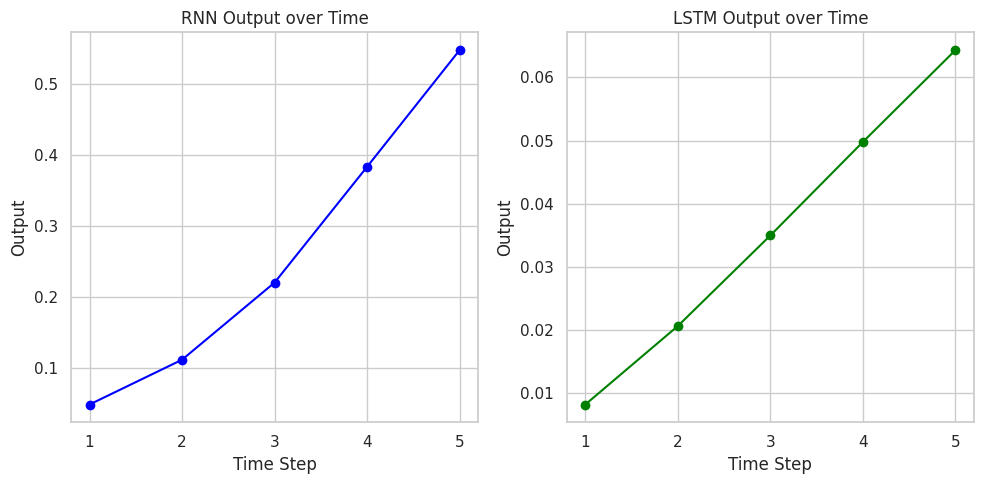

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

sns.set(style="whitegrid")

# Sample sequence data (time series)
X = np.array([
    [0.1],
    [0.2],
    [0.3],
    [0.4],
    [0.5]
])  # 5 timesteps, 1 feature

X = X.reshape((1, 5, 1))  # batch_size=1, timesteps=5, features=1

# ----------- Simple RNN -----------
rnn_model = Sequential()
rnn_model.add(SimpleRNN(4, return_sequences=True, input_shape=(5, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

rnn_outputs = rnn_model.predict(X)[0]  # shape: (5, 1)

# ----------- LSTM -----------
lstm_model = Sequential()
lstm_model.add(LSTM(4, return_sequences=True, input_shape=(5, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_outputs = lstm_model.predict(X)[0]  # shape: (5, 1)

# ----------- Plotting -----------

timesteps = range(1, 6)

plt.figure(figsize=(10, 5))

# RNN Output
plt.subplot(1, 2, 1)
plt.plot(timesteps, rnn_outputs, marker='o', color='blue')
plt.title("RNN Output over Time")
plt.xlabel("Time Step")
plt.ylabel("Output")
plt.xticks(timesteps)
plt.grid(True)

# LSTM Output
plt.subplot(1, 2, 2)
plt.plot(timesteps, lstm_outputs, marker='o', color='green')
plt.title("LSTM Output over Time")
plt.xlabel("Time Step")
plt.ylabel("Output")
plt.xticks(timesteps)
plt.grid(True)

plt.tight_layout()
plt.show()


VISULISING HIDDEN GATE OF LSTM
---

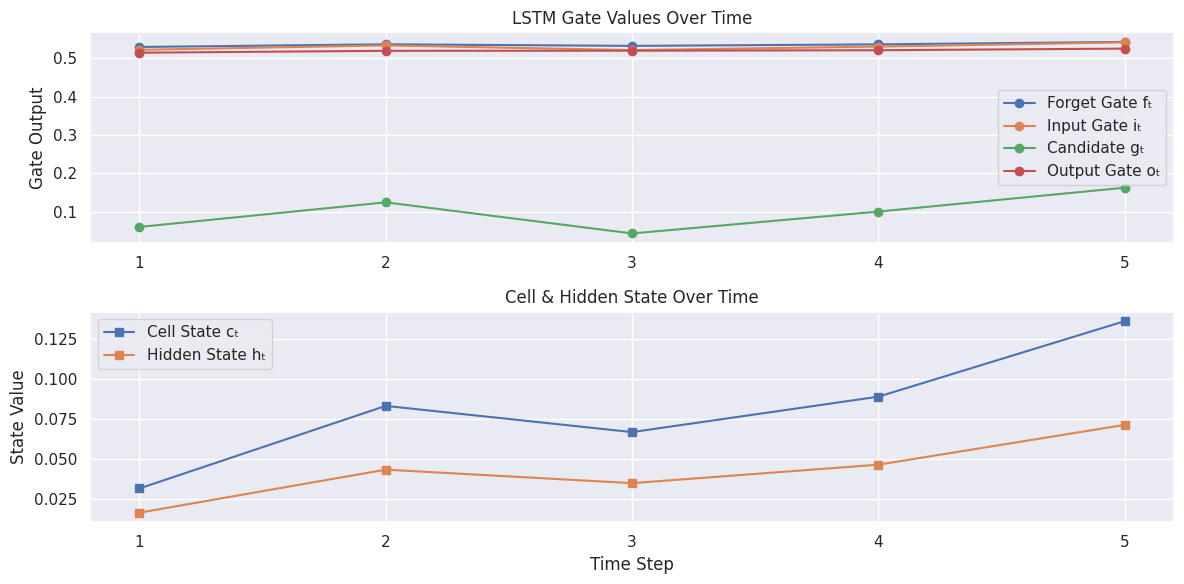

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# --- Activation functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# --- Parameters ---
input_size = 1
hidden_size = 1
timesteps = 5

# Random input sequence
x_seq = np.array([0.2, 0.4, 0.1, 0.3, 0.5])

# Initialize weights & biases (for demonstration: fixed small values)
Wf = np.array([[0.5, 0.1]])
Wi = np.array([[0.4, 0.2]])
Wg = np.array([[0.3, 0.3]])
Wo = np.array([[0.6, 0.05]])

bf = np.array([0.1])
bi = np.array([0.05])
bg = np.array([0])
bo = np.array([0.05])

# Initial states
h_prev = np.array([0.0])
c_prev = np.array([0.0])

# Tracking gate values
f_list, i_list, g_list, o_list, c_list, h_list = [], [], [], [], [], []

for t in range(timesteps):
    x_t = x_seq[t]

    combined = np.concatenate([h_prev, np.array([x_t])])  # [h_{t-1}, x_t]

    f_t = sigmoid(np.dot(Wf, combined) + bf)
    i_t = sigmoid(np.dot(Wi, combined) + bi)
    g_t = tanh(np.dot(Wg, combined) + bg)
    o_t = sigmoid(np.dot(Wo, combined) + bo)

    c_t = f_t * c_prev + i_t * g_t
    h_t = o_t * tanh(c_t)

    # Save for plotting
    f_list.append(f_t[0])
    i_list.append(i_t[0])
    g_list.append(g_t[0])
    o_list.append(o_t[0])
    c_list.append(c_t[0])
    h_list.append(h_t[0])

    # Update for next step
    c_prev = c_t
    h_prev = h_t

# --- Plotting ---
time = range(1, timesteps + 1)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, f_list, label="Forget Gate fₜ", marker='o')
plt.plot(time, i_list, label="Input Gate iₜ", marker='o')
plt.plot(time, g_list, label="Candidate gₜ", marker='o')
plt.plot(time, o_list, label="Output Gate oₜ", marker='o')
plt.title("LSTM Gate Values Over Time")
plt.ylabel("Gate Output")
plt.xticks(time)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, c_list, label="Cell State cₜ", marker='s')
plt.plot(time, h_list, label="Hidden State hₜ", marker='s')
plt.title("Cell & Hidden State Over Time")
plt.xlabel("Time Step")
plt.ylabel("State Value")
plt.xticks(time)
plt.legend()

plt.tight_layout()
plt.show()

LSTM OVER TIME
---

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# --- Sample dataset ---
data = np.array([i for i in range(1, 31)])  # Sequence: [1, 2, ..., 30]

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequence dataset
X = []
y = []
seq_len = 5

for i in range(len(data_scaled) - seq_len):
    X.append(data_scaled[i:i+seq_len])
    y.append(data_scaled[i+seq_len])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], seq_len, 1))  # [samples, time steps, features]

# --- Build Stacked LSTM model ---
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_len, 1)))  # 1st LSTM
model.add(LSTM(32, return_sequences=True))                            # 2nd LSTM
model.add(LSTM(16))                                                   # 3rd LSTM (no return_sequences)
model.add(Dense(1))                                                   # Output layer

model.compile(optimizer='adam', loss='mse')
model.summary()

# --- Train the model ---
model.fit(X, y, epochs=200, verbose=0)

# --- Predict ---
test_input = np.array([26, 27, 28, 29, 30])
test_input_scaled = scaler.transform(test_input.reshape(-1, 1)).flatten()
test_input_scaled = test_input_scaled.reshape((1, seq_len, 1))

pred_scaled = model.predict(test_input_scaled, verbose=0)
pred = scaler.inverse_transform(pred_scaled.reshape(-1, 1))

print("✅ Predicted next number:", pred[0][0])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 5, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

✅ Predicted next number: 30.882689
